# Regression model to predict total cyclists

Regression model to predict total cyclists

## Imports

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns

## Load the data

In [89]:
FILE_NAME = '04_2017_bike_data.csv'
bike = pd.read_csv(FILE_NAME, index_col=None, thousands=',')
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 30 non-null     object 
 1   day                  30 non-null     object 
 2   temp_high            30 non-null     float64
 3   temp_low             30 non-null     float64
 4   rain_amt             30 non-null     object 
 5   brooklyn_bridge      30 non-null     int64  
 6   manhattan_bridge     30 non-null     int64  
 7   williamsburg_bridge  30 non-null     int64  
 8   queensboro_bridge    30 non-null     int64  
 9   total_cyclists       30 non-null     int64  
 10  Unnamed: 10          1 non-null      object 
dtypes: float64(2), int64(5), object(4)
memory usage: 2.7+ KB


## Look at Sample Data

In [72]:
bike.head()

,date,day,temp_high,temp_low,rain_amt,brooklyn_bridge,manhattan_bridge,williamsburg_bridge,queensboro_bridge,total_cyclists,Unnamed: 10
0,1-Apr,Saturday,46.0,37.0,0,606,1446,1915,1430,5397,NaN
1,2-Apr,Sunday,62.1,41.0,0,2021,3943,4207,2862,13033,NaN
2,3-Apr,Monday,63.0,50.0,0.03,2470,4988,5178,3689,16325,NaN
3,4-Apr,Tuesday,51.1,46.0,1.18,723,1913,2279,1666,6581,NaN
4,5-Apr,Wednesday,63.0,46.0,0,2807,5276,5711,4197,17991,NaN


## Descriptive Analytics

In [73]:
bike.describe()

,temp_high,temp_low,brooklyn_bridge,manhattan_bridge,williamsburg_bridge,queensboro_bridge,total_cyclists
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,63.776667,50.686667,2250.100000,4353.900000,4942.266667,3482.800000,15029.066667
std,10.646796,7.243391,980.301198,1692.501767,1733.685449,1146.582971,5517.675272
min,46.000000,37.000000,461.000000,1324.000000,1739.000000,1372.000000,4896.000000
25%,55.900000,46.000000,1461.250000,3147.250000,3776.000000,2709.500000,11088.000000
50%,64.000000,50.000000,2422.500000,4608.500000,5141.500000,3560.500000,15783.500000
75%,67.500000,54.750000,2954.750000,5545.250000,6040.250000,4263.000000,18927.500000
max,84.900000,64.000000,3887.000000,7247.000000,8079.000000,5501.000000,24714.000000


## Convert string to numerical data

In [90]:
# 'T' is for trace amount of rain
bike['rain_amt'] = bike['rain_amt'] \
.replace('0', 0.0) \
.replace('T', 0.001) \
.replace(',', '', regex=True).astype(float)

bike.describe()

,temp_high,temp_low,rain_amt,brooklyn_bridge,manhattan_bridge,williamsburg_bridge,queensboro_bridge,total_cyclists
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,63.776667,50.686667,0.128167,2250.100000,4353.900000,4942.266667,3482.800000,15029.066667
std,10.646796,7.243391,0.293974,980.301198,1692.501767,1733.685449,1146.582971,5517.675272
min,46.000000,37.000000,0.000000,461.000000,1324.000000,1739.000000,1372.000000,4896.000000
25%,55.900000,46.000000,0.000000,1461.250000,3147.250000,3776.000000,2709.500000,11088.000000
50%,64.000000,50.000000,0.000500,2422.500000,4608.500000,5141.500000,3560.500000,15783.500000
75%,67.500000,54.750000,0.052500,2954.750000,5545.250000,6040.250000,4263.000000,18927.500000
max,84.900000,64.000000,1.180000,3887.000000,7247.000000,8079.000000,5501.000000,24714.000000


## Convert date to actual date time

In [91]:
from datetime import datetime

current_year = datetime.now().year

bike['date'] = pd.to_datetime(bike['date'] + ' ' + str(current_year))

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 30 non-null     datetime64[ns]
 1   day                  30 non-null     object        
 2   temp_high            30 non-null     float64       
 3   temp_low             30 non-null     float64       
 4   rain_amt             30 non-null     float64       
 5   brooklyn_bridge      30 non-null     int64         
 6   manhattan_bridge     30 non-null     int64         
 7   williamsburg_bridge  30 non-null     int64         
 8   queensboro_bridge    30 non-null     int64         
 9   total_cyclists       30 non-null     int64         
 10  Unnamed: 10          1 non-null      object        
dtypes: datetime64[ns](1), float64(3), int64(5), object(2)
memory usage: 2.7+ KB


## Categorical Data

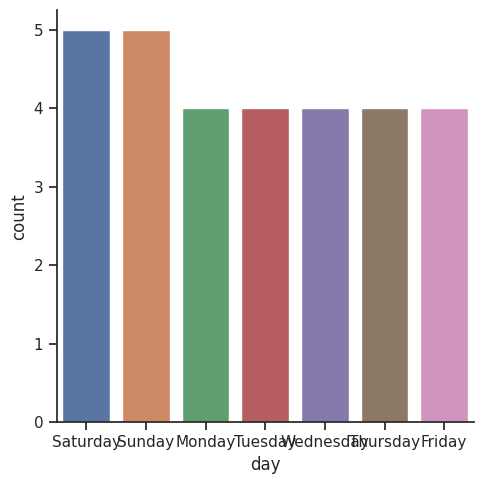

In [76]:
import category_encoders as ce

sns.set_theme(style="ticks", color_codes=True)
sns.catplot(x='day', kind='count', data=bike)

In [92]:
# function to check to see if day is a weekend
is_weekend_func = lambda x: 1 if x in ['Saturday', 'Sunday'] else 0

# use weekend checking function
bike['is_weekend'] = bike['day'].apply(is_weekend_func)

#encoder = ce.OrdinalEncoder(cols=['day'])
#bike_encoded = encoder.fit_transform(bike)

#bike['day_type'] = bike_encoded['day']
##test.head()

#one_hot_encoder = ce.OneHotEncoder(cols=['day'])
#bike = one_hot_encoder.fit_transform(bike)

bike.head()

,date,day,temp_high,temp_low,rain_amt,brooklyn_bridge,manhattan_bridge,williamsburg_bridge,queensboro_bridge,total_cyclists,Unnamed: 10,is_weekend
0,2023-04-01,Saturday,46.0,37.0,0.00,606,1446,1915,1430,5397,NaN,1
1,2023-04-02,Sunday,62.1,41.0,0.00,2021,3943,4207,2862,13033,NaN,1
2,2023-04-03,Monday,63.0,50.0,0.03,2470,4988,5178,3689,16325,NaN,0
3,2023-04-04,Tuesday,51.1,46.0,1.18,723,1913,2279,1666,6581,NaN,0
4,2023-04-05,Wednesday,63.0,46.0,0.00,2807,5276,5711,4197,17991,NaN,0


## Descriptive statistics

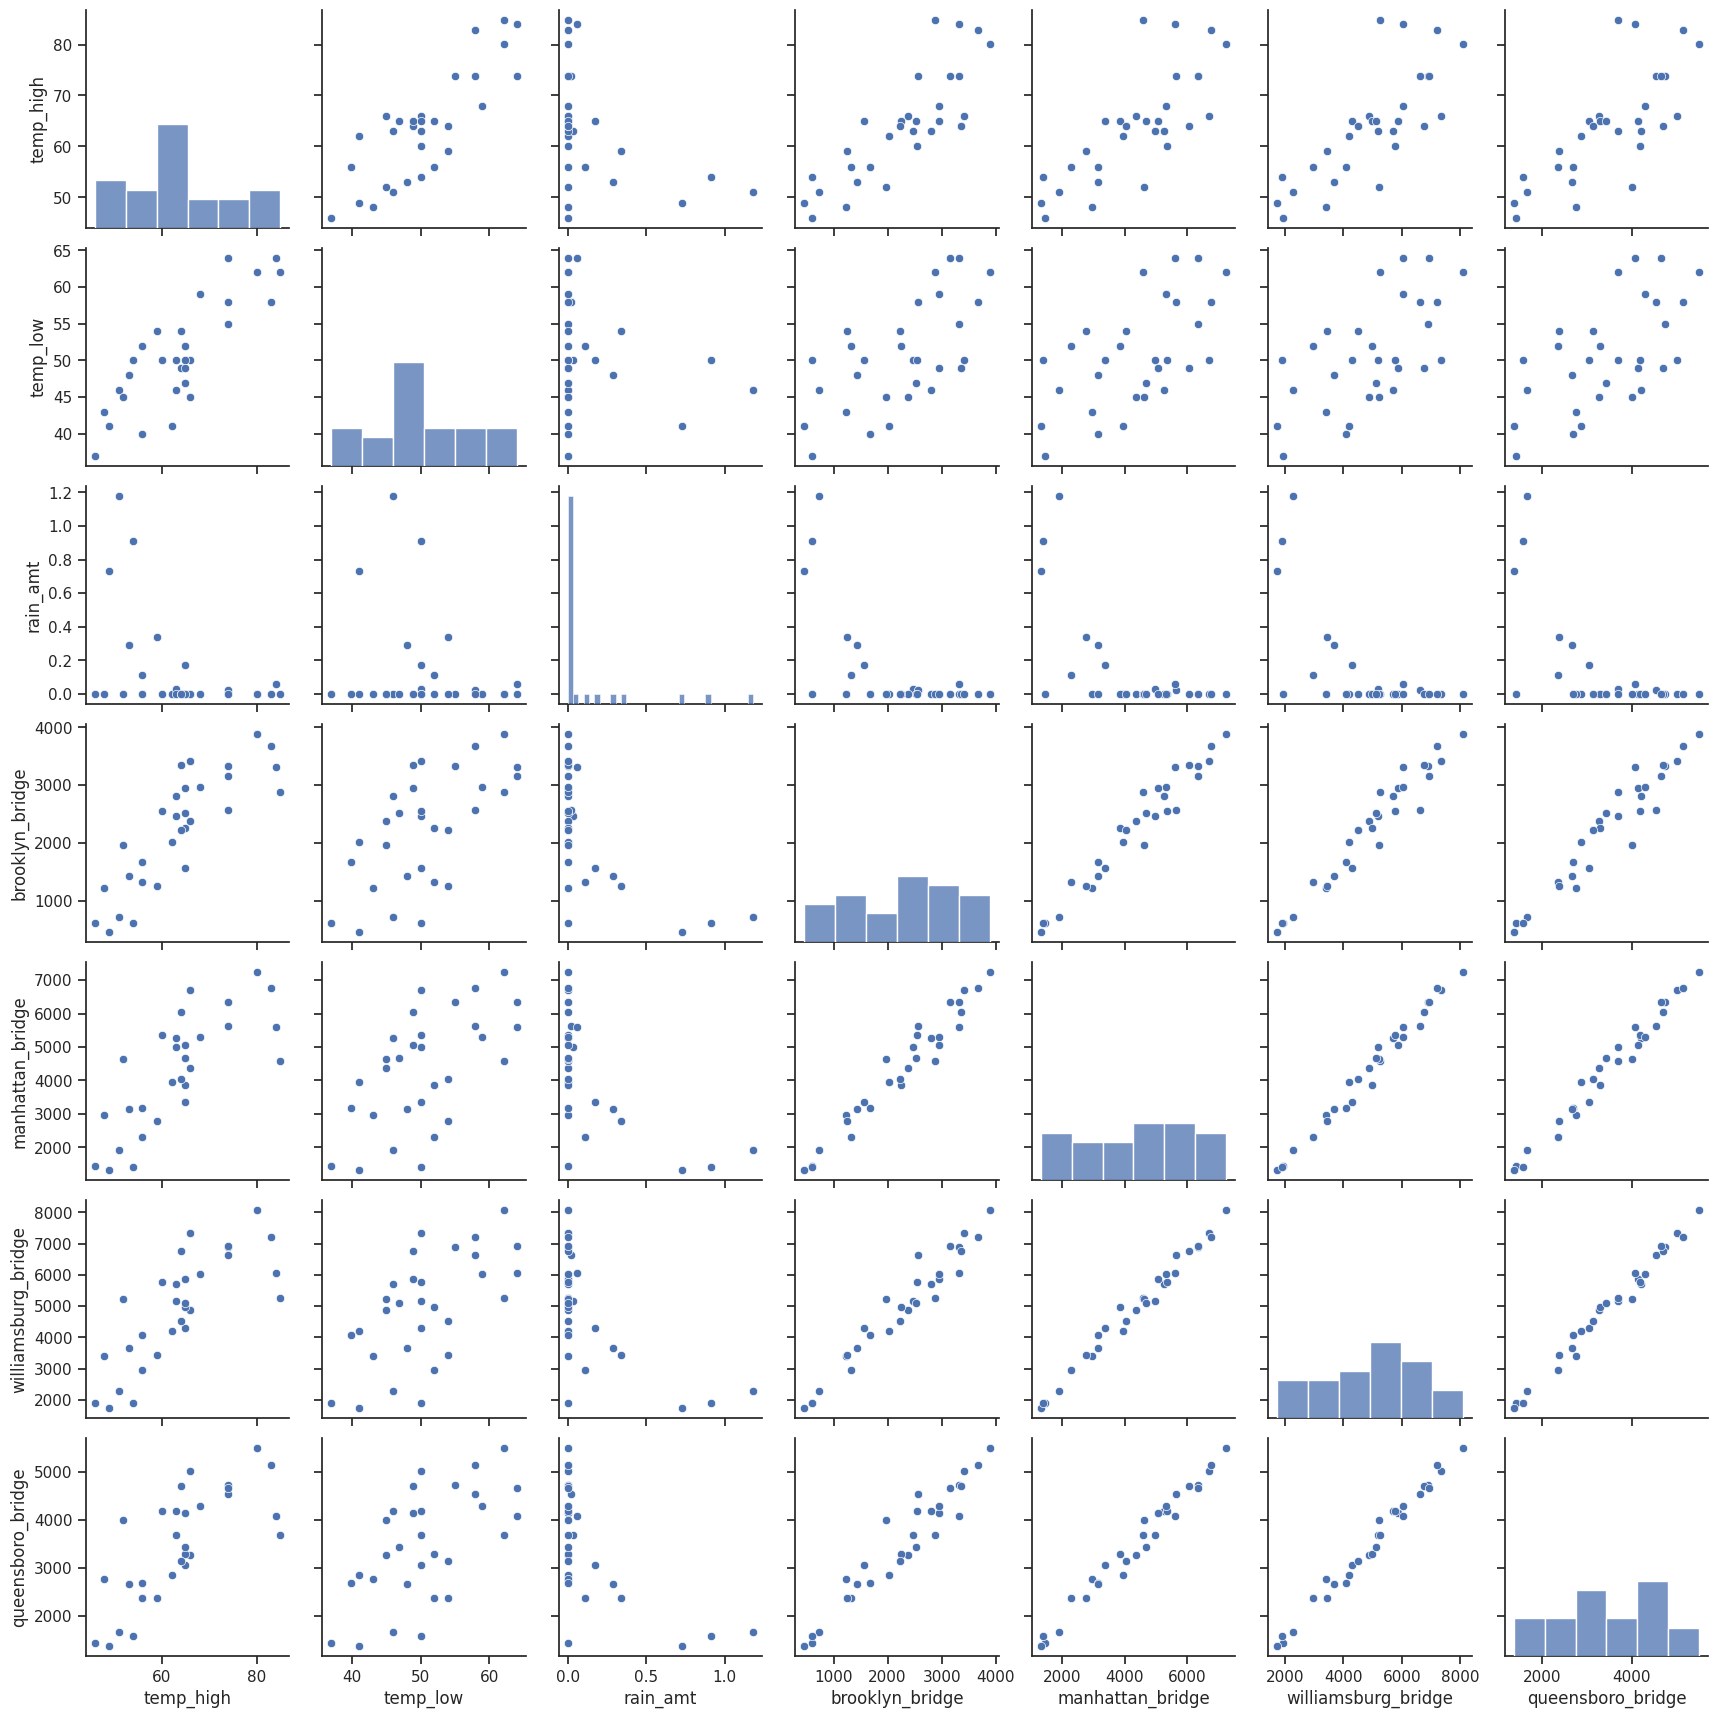

In [94]:
numerical_features = ['temp_high', 'temp_low', 'rain_amt', 'brooklyn_bridge', 'manhattan_bridge', 'williamsburg_bridge', 'queensboro_bridge'] #, 'is_weekend'] # 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'day_7']

sns.pairplot(bike[numerical_features]) #, plot_kws={"s": 2})

In [96]:
bike[numerical_features].corr()

,temp_high,temp_low,rain_amt,brooklyn_bridge,manhattan_bridge,williamsburg_bridge,queensboro_bridge
temp_high,1.000000,0.828971,-0.426571,0.837217,0.772022,0.779099,0.746357
temp_low,0.828971,1.000000,-0.193001,0.633997,0.597605,0.613643,0.602206
rain_amt,-0.426571,-0.193001,1.000000,-0.636688,-0.619552,-0.632465,-0.630435
brooklyn_bridge,0.837217,0.633997,-0.636688,1.000000,0.975107,0.971787,0.959740
manhattan_bridge,0.772022,0.597605,-0.619552,0.975107,1.000000,0.992124,0.988148
williamsburg_bridge,0.779099,0.613643,-0.632465,0.971787,0.992124,1.000000,0.992293
queensboro_bridge,0.746357,0.602206,-0.630435,0.959740,0.988148,0.992293,1.000000


## Standardization - centering and scaling

In [111]:
bike['total_cyclists_pred'] = bike['total_cyclists']

numerical_features = ['temp_high', 'temp_low', 'rain_amt']

# prepare features (X - input variables) and the target (y) variable
X = bike[numerical_features]
y = bike['total_cyclists_pred']

from sklearn.model_selection import train_test_split

# 90-10 split
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train[numerical_features])

X_train.loc[:, numerical_features] = scaler.transform(X_train[numerical_features])

#bike.head()
#X.head()
X_train[numerical_features].head()

,temp_high,temp_low,rain_amt
26,0.322301,1.110996,-0.413021
8,0.132091,-0.914843,-0.413021
27,1.739371,0.951823,-0.413021
12,-0.058120,-0.350502,-0.413021
21,-0.828473,0.098076,-0.019226


In [112]:
X_train[numerical_features].describe().round(4)

,temp_high,temp_low,rain_amt
count,27.0000,27.0000,27.0000
mean,-0.0000,-0.0000,0.0000
std,1.0190,1.0190,1.0190
min,-1.7700,-2.0725,-0.4130
25%,-0.6811,-0.7050,-0.4130
50%,0.0275,-0.1913,-0.4094
75%,0.6029,0.7420,-0.2519
max,1.9296,1.8345,3.8113


## Multiple Linear Regression (MLR)

In [115]:
from sklearn.linear_model import LinearRegression

ml_reg = LinearRegression()

ml_reg.fit(X_train, y_train)

y_pred_ml_reg = ml_reg.predict(X_train)

pd.Series(ml_reg.coef_, index=X_train.columns).sort_values(ascending=False).round(2)

temp_high    3013.27
temp_low      326.02
rain_amt    -1990.62
dtype: float64

In [116]:
# ml_reg.fit(X_train.drop('rain_amt', axis=1), y_train)

# pd.Series(ml_reg.coef_, index=X_train.drop('rain_amt', axis=1).columns).sort_values(ascending=False).round(2)

## Mean squared error (MSE)

In [117]:
from sklearn.metrics import mean_squared_error

mse_ml_reg = mean_squared_error(y_true=y_train, y_pred=y_pred_ml_reg)

print('{:0.2f}M'.format(mse_ml_reg/1e6))

8.59M


In [118]:
# The above number should be lower than this number
y_pred_null_model = np.full(y_train.shape, y_train.mean())
mse_null_model = mean_squared_error(y_true=y_train, y_pred=y_pred_null_model)
mse_null_model

28125064.677640602